In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os 

In [29]:
train = '/kaggle/input/teecth-classification/Teeth_Dataset/Training'
test = '/kaggle/input/teecth-classification/Teeth_Dataset/Testing'
val = '/kaggle/input/teecth-classification/Teeth_Dataset/Validation'

In [30]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 48

train_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.


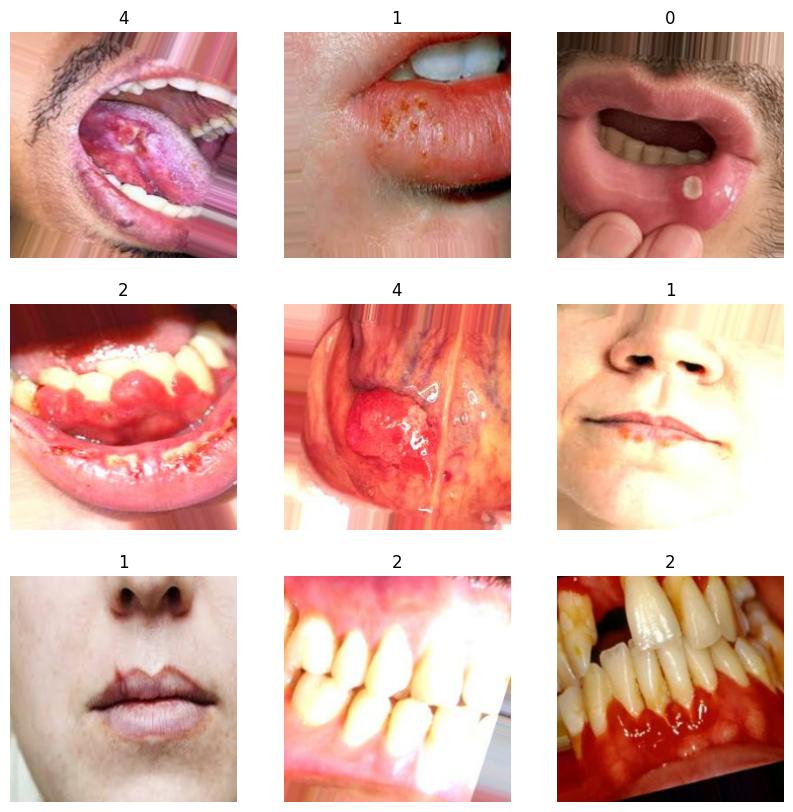

In [31]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

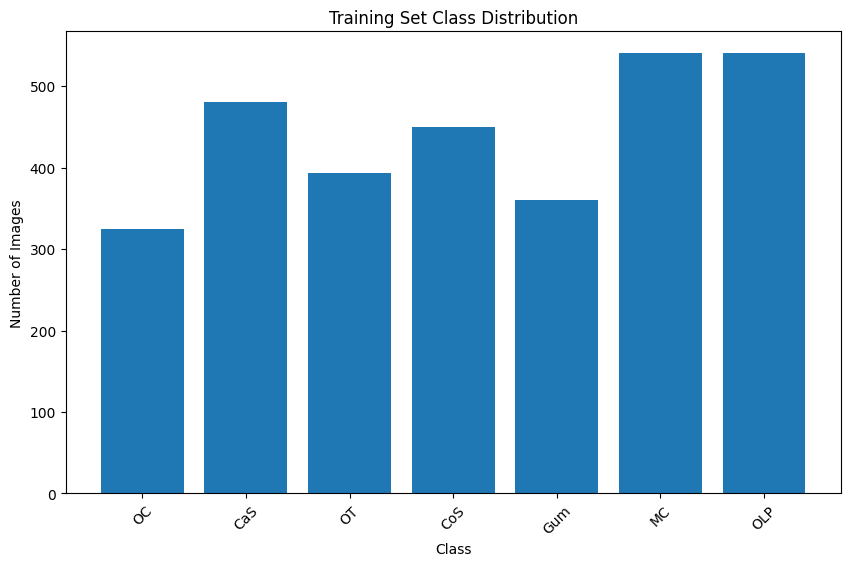

{'OC': 324, 'CaS': 480, 'OT': 393, 'CoS': 450, 'Gum': 360, 'MC': 540, 'OLP': 540}


In [32]:
import os
import matplotlib.pyplot as plt

classes = os.listdir(train)
class_counts = [len(os.listdir(os.path.join(train, c))) for c in classes]

plt.figure(figsize=(10,6))
plt.bar(classes, class_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

print(dict(zip(classes, class_counts)))

In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


IMG_SIZE = 224  
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
   
)
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    val,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_generator.num_classes
print(f"Category number : {num_classes}")

Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Category number : 7


In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 7

def classifier():
    model = keras.models.Sequential([
        # First convolution + pooling
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D(2,2),

        # Second convolution + pooling
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        # Third convolution + pooling
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        # Flatten
        layers.Flatten(),

        # Fully connected
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),

        # Output layer
        layers.Dense(num_classes, activation='sigmoid')
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [46]:
model = classifier()

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.1581 - loss: 2.5720 - val_accuracy: 0.2023 - val_loss: 2.0193
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.2576 - loss: 1.8587 - val_accuracy: 0.3366 - val_loss: 1.7450
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 243s 3s/step - accuracy: 0.3203 - loss: 1.7426 - val_accuracy: 0.4018 - val_loss: 1.6082
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.4100 - loss: 1.5733 - val_accuracy: 0.4543 - val_loss: 1.4444
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.4379 - loss: 1.4794 - val_accuracy: 0.4455 - val_loss: 1.4627
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.4631 - loss: 1.4314 - val_accuracy: 0.5175 - val_loss: 1.2849
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.5197 - loss: 1.2914 - val_accuracy: 0.5584 - val_loss: 1.2101
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.5429 - loss: 1.2313 - val_accuracy: 0.5447 - v